1\. **Spotting correlations**

Load the remote file:

```bash
https://www.dropbox.com/s/aamg1apjhclecka/regression_generated.csv
```

with Pandas and create scatter plots with all possible combinations of the following features:
    
  + `features_1`
  + `features_2`
  + `features_3`
  
Are these features correlated? Please add a comment.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

/usr/local/lib/python3.10/dist-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
# If haven't downloaded it yet, please get the data file with wget
!wget https://www.dropbox.com/s/aamg1apjhclecka/regression_generated.csv -P ./data/

In [3]:
file_name = "./data/regression_generated.csv"
df = pd.read_csv(file_name)
#df

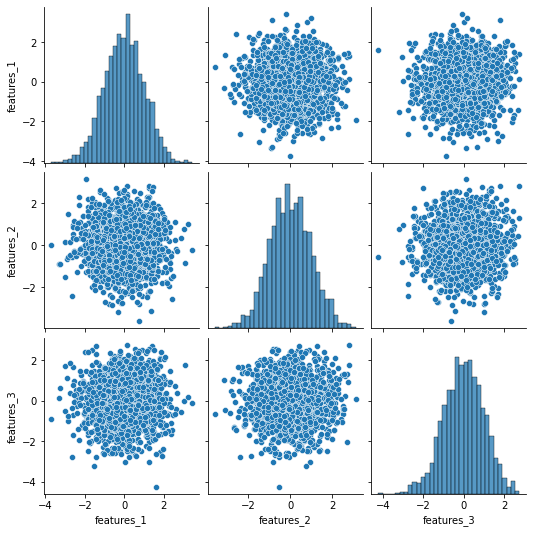

In [4]:
data_features = df.iloc[:,1:4]
sns.pairplot(data_features)

# It seems as there is little to no correlation. The histograms are all evenly distributed around 0, 
# and the scatter-plots are also evenly spread out.  

2\. **Color-coded scatter plot**

Produce a scatter plot from a dataset with two categories.

* Write a function that generates a 2D dataset consisting of 2 categories. Each category should distribute as a 2D gaussian with a given mean and standard deviation. Set different values of the mean and standard deviation between the two samples.
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below:

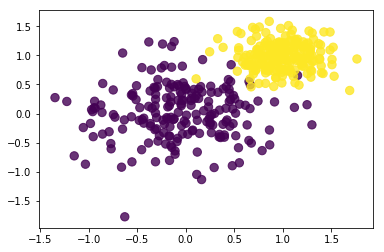

In [8]:
from IPython.display import Image
Image('images/two_categories_scatter_plot.png')

In [17]:
def gen_2_cat(num_samples, mean1, std1, mean2, std2):
    np.random.seed(42)
    cat1 = np.random.multivariate_normal(mean1, np.diag(std1), num_samples)
    cat2 = np.random.multivariate_normal(mean2, np.diag(std2), num_samples)

    dataset = np.vstack((cat1, cat2))

    labels = np.hstack((np.zeros(num_samples), np.ones(num_samples)))

    return dataset, labels



In [18]:
mean1 = [2, 2]
std1 = [1, 1]

mean2 = [-3, -3]
std2 = [0.5, 0.5]

num_samples = 50
data, labels = gen_2_cat(num_samples, mean1, std1, mean2, std2)

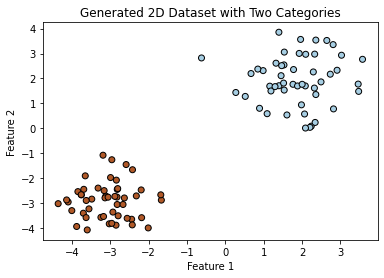

In [19]:
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap=plt.cm.Paired, edgecolor='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Generated datasets ')
plt.show()

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following pickle file:
```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```
* Inspect the dataset, you'll find two variables (features)
* Convert the content to a Pandas Dataframe
* Clean the sample by selecting the entries (rows) with the absolute values of the variable "residual" smaller than 2
* Plot a Seaborn `jointplot` of "residuals" versus "distances", and use seaborn to display a linear regression. 

Comment on the correlation between these variables.

* Create manually (without using seaborn) the profile histogram for the "distance" variable; choose an appropriate binning.
* Obtain 3 numpy arrays:
  * `x`, the array of bin centers of the profile histogram of the "distance" variable
  * `y`, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * `err_y`, the standard deviation of the of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

In [2]:
import pickle

In [15]:
!wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/

In [3]:
file_name2 = "./data/residuals_261.pkl"
infile = open(file_name2, 'rb')
new_df = pickle.load(infile)
infile.close()

new_df

array({'residuals': array([ 1.1       , -1.95      , -7.2       , ...,  0.08333333,
        0.16666667,  0.08333333]), 'distances': array([16. ,  6.3,  3.4, ...,  1.7, 19.1,  2.6])},
      dtype=object)

In [4]:
nested_dict = new_df.item()

In [5]:
residuals = nested_dict['residuals']
distances = nested_dict['distances']

In [6]:
df = pd.DataFrame({'Residuals': residuals, 'Distances': distances})
print(df)

       Residuals  Distances
0       1.100000       16.0
1      -1.950000        6.3
2      -7.200000        3.4
3      -4.150000        8.4
4      -6.590000        1.7
...          ...        ...
11126  -0.760000       14.4
11127   0.380000        7.5
11128   0.083333        1.7
11129   0.166667       19.1
11130   0.083333        2.6

[11131 rows x 2 columns]


In [7]:
filtered_df = df[abs(df['Residuals']) < 2]
df_filtered = df.drop(filtered_df.index).reset_index(drop=True)
df_filtered

,Residuals,Distances
0,-7.20,3.4
1,-4.15,8.4
2,-6.59,1.7
3,-11.02,4.4
4,-2.27,0.6
...,...,...
637,-3.26,1.4
638,-3.51,13.9
639,-4.38,9.6
640,-2.64,4.6


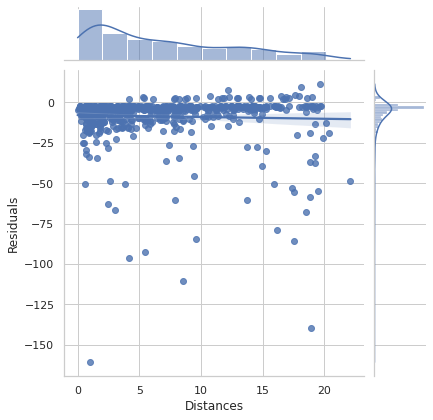

In [11]:
sns.set(style="whitegrid")
joint_plot = sns.jointplot(x=df_filtered['Distances'], y=df_filtered['Residuals'], kind='reg')

plt.show()

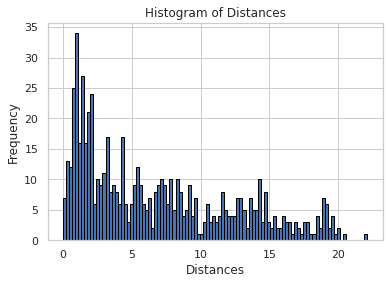

In [17]:
num_bins = 100
plt.hist(df_filtered['Distances'], bins=num_bins, edgecolor='black')  # Adjust the number of bins as needed

plt.title('Histogram of Distances')
plt.xlabel('Distances')
plt.ylabel('Frequency')
plt.show()

In [41]:
distances = np.array(df_filtered['Distances'])
residuals = np.array(df_filtered['Residuals'])

hist, bin_edges = np.histogram(distances, bins=num_bins)
x = (bin_edges[:-1] + bin_edges[1:]) / 2

y = []
err_y = []
for i in range(len(bin_edges) - 1):
    indices_in_bin = np.where((distances >= bin_edges[i]) & (distances < bin_edges[i + 1]))
    residuals_in_bin = residuals[indices_in_bin]
    y.append(np.mean(residuals_in_bin))
    err_y.append(np.std(residuals_in_bin))

print('The array of bin centers: \n')
print(x)

print('The mean values of the residuals: \n')
print(np.round(y,3))

print('The standard deviation of the of the "residuals", estimated in slices (bins) of "distance": \n')
print(np.round(err_y,3))



The array of bin centers: 

[ 0.1105  0.3315  0.5525  0.7735  0.9945  1.2155  1.4365  1.6575  1.8785
  2.0995  2.3205  2.5415  2.7625  2.9835  3.2045  3.4255  3.6465  3.8675
  4.0885  4.3095  4.5305  4.7515  4.9725  5.1935  5.4145  5.6355  5.8565
  6.0775  6.2985  6.5195  6.7405  6.9615  7.1825  7.4035  7.6245  7.8455
  8.0665  8.2875  8.5085  8.7295  8.9505  9.1715  9.3925  9.6135  9.8345
 10.0555 10.2765 10.4975 10.7185 10.9395 11.1605 11.3815 11.6025 11.8235
 12.0445 12.2655 12.4865 12.7075 12.9285 13.1495 13.3705 13.5915 13.8125
 14.0335 14.2545 14.4755 14.6965 14.9175 15.1385 15.3595 15.5805 15.8015
 16.0225 16.2435 16.4645 16.6855 16.9065 17.1275 17.3485 17.5695 17.7905
 18.0115 18.2325 18.4535 18.6745 18.8955 19.1165 19.3375 19.5585 19.7795
 20.0005 20.2215 20.4425 20.6635 20.8845 21.1055 21.3265 21.5475 21.7685
 21.9895]
The mean values of the residuals: 

[-3.4170e+00 -8.6250e+00 -1.1405e+01 -9.9260e+00 -1.3640e+01 -5.9960e+00
 -6.6820e+00 -8.1690e+00 -6.9760e+00 -6.0060e+00 -

4\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn):

* Fill a numpy array `x` of length N (with $N=\mathcal{O}(100)$) with a variable normally distributed, with a given mean and standard deviation
* Fill an histogram in pyplot taking proper care of the aesthetic:
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* For every element of `x`, create a gaussian with the mean corresponding to the element value and the standard deviation as a parameter that can be tuned. The standard deviation default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with `np.sum()`) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method. Superimpose the normalized sum of all gaussians to the first histogram.


In [26]:
from scipy.stats import norm
from scipy import stats
from scipy import integrate

In [32]:
mu = 0
std = 1
N = 100

np.random.seed(42)
x = np.random.normal(mu, std, N)

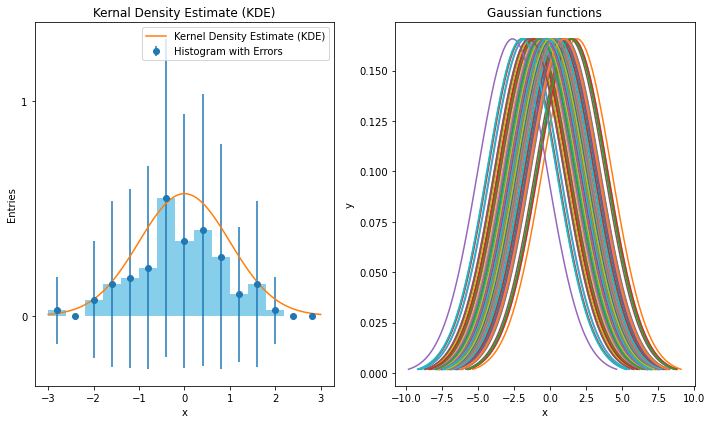

In [48]:
fig = plt.figure(figsize=(10, 6))
plt.subplot(1,2,1)
h, bins, _ = plt.hist(x, bins=15, range=(-3, +3), density=True, cumulative=False,color='skyblue')

bin_centers = (bins[:-1] + bins[1:]) / 2
errors = np.sqrt(h) #poisson uncertainty
plt.errorbar(bin_centers, h, yerr=errors, fmt='o', label='Histogram with Errors')

#Create KDE 
kde_x = np.linspace(-3,3, 100)
kde_y = (N / 70) * norm.pdf(kde_x, mu, std)
plt.plot(kde_x, kde_y, label='Kernel Density Estimate (KDE)')

ax1 = fig.axes[0]
ax1.set_title('Kernal Density Estimate (KDE)')
ax1.set_xlabel('x')
ax1.set_ylabel('Entries')
plt.yticks(np.arange(0, np.max(h) + 1, 1)) 
plt.legend()
fig.tight_layout()

gaus_eq = lambda x: 1.06 * x.std() * x.size ** (1/5)
gaus_res = gaus_eq(x)
gaus_sum = np.zeros_like(kde_x)

plt.subplot(1,2,2)
for i in x:
    xx = np.linspace(i - 3*gaus_res, i + 3*gaus_res, N)
    yy = stats.norm.pdf(xx, i, gaus_res)
    plt.plot(xx, yy)
    gaus_sum += yy 
    
ax2 = fig.axes[1]
ax2.set_title('Gaussian functions')
ax2.set_xlabel('x')
ax2.set_ylabel('y')

plt.tight_layout()
plt.show()

Text(0, 0.5, 'Entries')

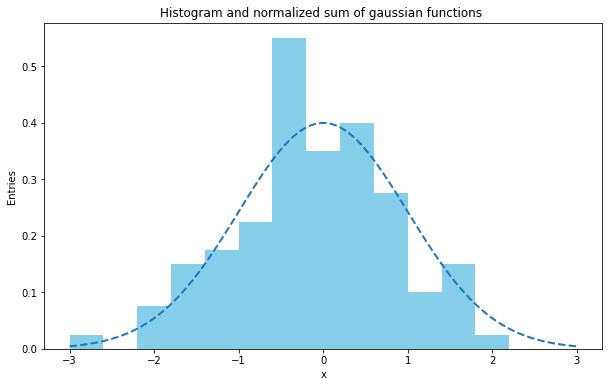

In [49]:
gaus_sum /= integrate.trapz(gaus_sum, kde_x)
fig = plt.figure(figsize=(10, 6))
plt.plot(kde_x, gaus_sum, label='Normalized Sum of Gaussians', linestyle='--', linewidth=2)
plt.hist(x, bins=15, range=(-3, +3), density=True, cumulative=False, color='skyblue')

ax3 = fig.axes[0]
ax3.set_title('Histogram and normalized sum of gaussian functions ')
ax3.set_xlabel('x')
ax3.set_ylabel('Entries')